In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler

In [9]:
# setting the seeds
np.random.seed(0)
torch.manual_seed(0)

In [10]:
root_dir = '../dataset/Images' # where the data lies
device = 'cuda' if torch.cuda.is_available() else 'cpu' # the hardware device

print("The data we are working with lies in the following location: ")
print(root_dir)
print(f"We are using the device {device}")

The data we are working with lies in the following location: 
../dataset/Images
We are using the device cuda


In [11]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')

In [12]:
# image transformations
image_transforms = {
    "train": transforms.Compose([
        transforms.Resize((28,28)),
        # Randomly augment the image data
        # Random horizontal flip
        transforms.RandomHorizontalFlip(0.5),
        # Random vertical flip
        transforms.RandomVerticalFlip(0.3),
        # transform to tensors
        transforms.ToTensor(),
        # Normalize the pixel values (in R, G, and B channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),


        # transforms.Resize((512,512)),
        # transforms.ToTensor(),
        # transforms.Normalize([0.458, 0.456, 0.406],
        #                      [0.229, 0.224, 0.225])

    ])


    # transforms.Resize((224, 224)), # resize each image to the size 224 * 224
    # transforms.ToTensor()          # convert image to pytorch tensors

}

In [13]:
natural_img_dataset = datasets.ImageFolder(
    root = root_dir,
    transform = image_transforms["train"]
)
print(natural_img_dataset)

Dataset ImageFolder
    Number of datapoints: 20580
    Root location: ../dataset/Images
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.3)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


RuntimeError: shape '[28, 28]' is invalid for input of size 2352

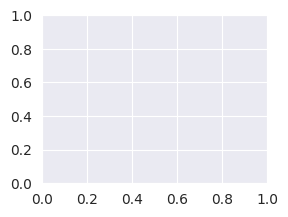

In [14]:
N_IMAGES = 5

images = [image for image, label in [natural_img_dataset[i] for i in range(N_IMAGES)]]

plot_images(images)

In [15]:
from glob import glob

In [28]:
def dog_class_graph(loc):
    list_names = []
    num_files = []
    dog_db = pd.DataFrame()

    for  folder in sorted(glob(f"{loc}/*/")):
        list_names.append(folder.split("-")[1])
        print(len(folder))
        num_files.append(len(folder))
    dog_db['breed_name'] = list_names
    dog_db['num_images'] = num_files
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    plt.bar(list_names, num_files)
    plt.show()
    return dog_db

38
45
40
37
37
45
37
40
48
41
35
35
39
37
52
41
45
36
35
44
46
36
41
47
39
35
47
39
54
59
47
43
47
42
44
44
46
52
45
45
37
34
47
43
40
48
44
47
43
44
42
56
56
34
50
51
45
47
53
56
35
43
41
42
45
36
45
51
43
43
48
35
39
40
37
35
35
37
49
46
35
42
49
39
44
37
47
55
49
40
40
34
41
44
43
39
42
39
37
43
42
36
32
37
41
43
36
39
33
37
46
37
37
39
45
44
45
34
34
48


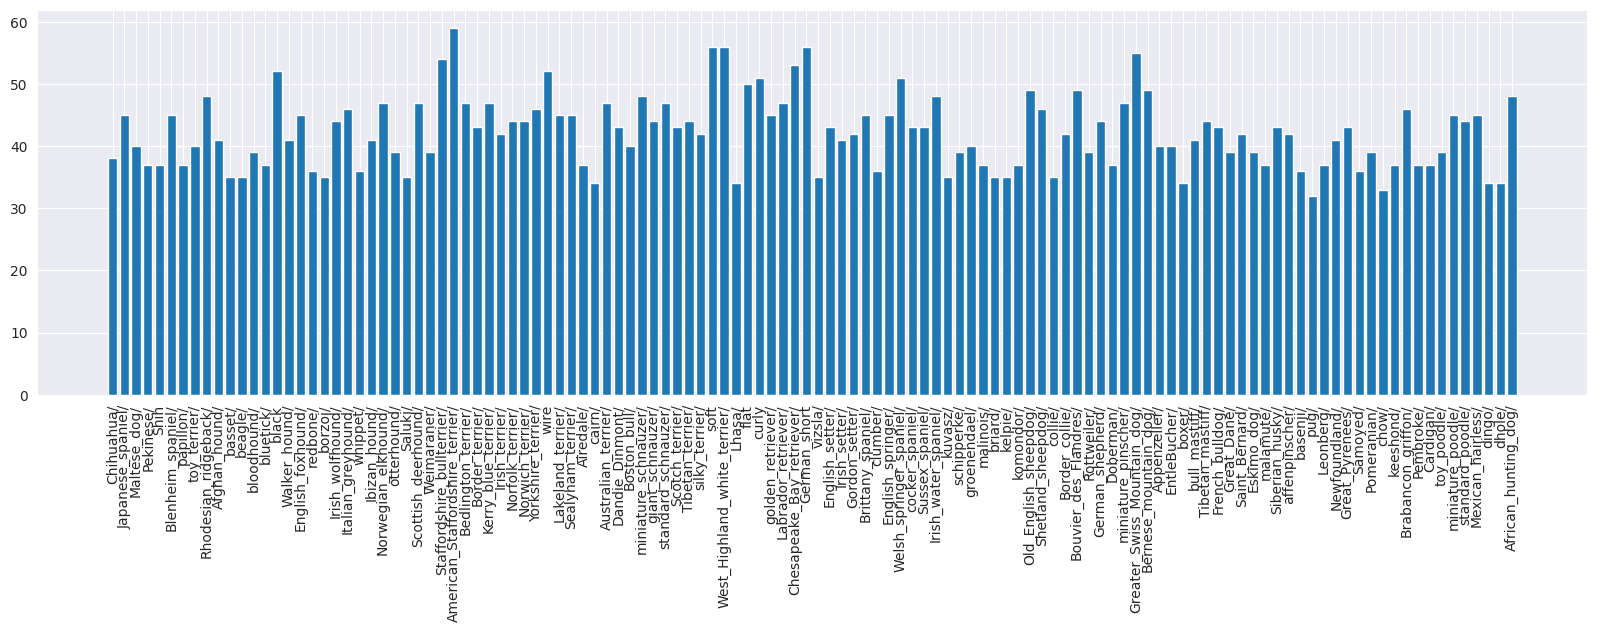

breed_name  num_images
0              Chihuahua/          38
1       Japanese_spaniel/          45
2            Maltese_dog/          40
3               Pekinese/          37
4                    Shih          37
..                    ...         ...
115      standard_poodle/          44
116     Mexican_hairless/          45
117                dingo/          34
118                dhole/          34
119  African_hunting_dog/          48

[120 rows x 2 columns]

In [29]:
dog_class_graph("../dataset/Images/")

In [35]:
# from keras.preprocessing import image
import keras.utils as image

In [38]:
def img_show(index):
    img_path = "../dataset/Images/n02085620-Chihuahua/n02085620_7.jpg"
    img = image.load_img(img_path)
    return img

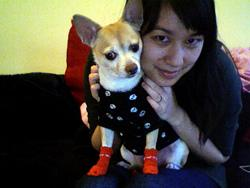

In [39]:
img_show(10)

In [ ]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import cv2#%%
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler

In [ ]:
# setting the seeds
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
root_dir = '../dataset/Images' # where the data lies
device = 'cuda' if torch.cuda.is_available() else 'cpu' # the hardware device

print("The data we are working with lies in the following location: ")
print(root_dir)
print(f"We are using the device {device}")

In [ ]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')

In [ ]:
# image transformations
image_transforms = {
    "train": transforms.Compose([
        transforms.Resize((28,28)),
        # Randomly augment the image data
        # Random horizontal flip
        transforms.RandomHorizontalFlip(0.5),
        # Random vertical flip
        transforms.RandomVerticalFlip(0.3),
        # transform to tensors
        transforms.ToTensor(),
        # Normalize the pixel values (in R, G, and B channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),


        # transforms.Resize((512,512)),
        # transforms.ToTensor(),
        # transforms.Normalize([0.458, 0.456, 0.406],
        #                      [0.229, 0.224, 0.225])

    ])


    # transforms.Resize((224, 224)), # resize each image to the size 224 * 224
    # transforms.ToTensor()          # convert image to pytorch tensors

}

In [ ]:
natural_img_dataset = datasets.ImageFolder(
    root = root_dir,
    transform = image_transforms["train"]
)
print(natural_img_dataset)

In [ ]:
N_IMAGES = 5

images = [image for image, label in [natural_img_dataset[i] for i in range(N_IMAGES)]]

plot_images(images)

In [ ]:
from glob import glob

In [ ]:
def dog_class_graph(loc):
    list_names = []
    num_files = []
    dog_db = pd.DataFrame()

    for  folder in sorted(glob(f"{loc}/*/")):
        list_names.append(folder.split("-")[1])
        print(len(folder))
        num_files.append(len(folder))
    dog_db['breed_name'] = list_names
    dog_db['num_images'] = num_files
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    plt.bar(list_names, num_files)
    plt.show()
    return dog_db

In [ ]:
dog_class_graph("../dataset/Images/")

In [ ]:
# from keras.preprocessing import image
import keras.utils as image

In [ ]:
def img_show(index):
    img_path = "../dataset/Images/n02085620-Chihuahua/n02085620_7.jpg"
    img = image.load_img(img_path)
    return img

In [ ]:
img_show(10)

In [45]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import cv2

In [ ]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 120)
    return dog_files, dog_targets

In [ ]:
train_files, train_targets = load_dataset('../dataset/Images/')

In [ ]:
print('There are %d training dog images.' % len(train_files))
# print('There are %d total dog categories.' % len(dog_names))

In [47]:
# get heigth and width of the dog images
height, width = [], []
for idx in range(len(train_files)):
    img = cv2.imread(train_files[idx])
    height.append(img.shape[0])
    width.append(img.shape[1])

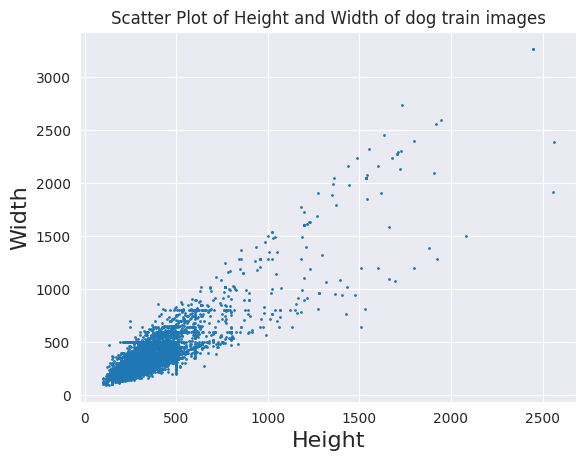

In [48]:
plt.scatter(height,width, s=1)
plt.xlabel('Height', fontsize=16)
plt.ylabel('Width', fontsize=16)
plt.title('Scatter Plot of Height and Width of dog train images')
plt.show()

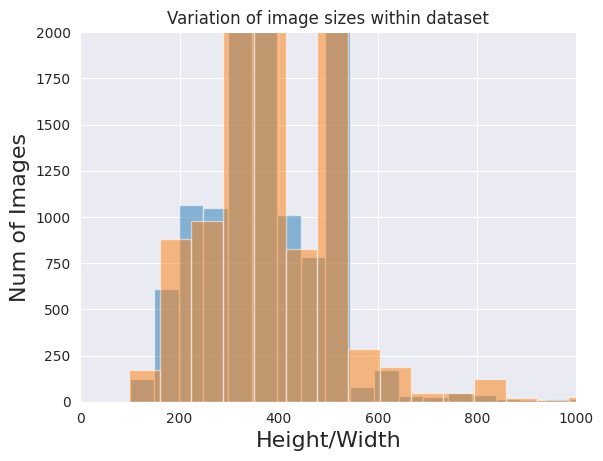

In [49]:
plt.hist(height,bins = 50, alpha=0.5)
plt.hist(width,bins = 50,alpha=0.5)
plt.axis([0,1000,0,2000])
plt.xlabel('Height/Width', fontsize=16)
plt.ylabel('Num of Images', fontsize=16)
plt.title('Variation of image sizes within dataset')
plt.show()

In [84]:
img1 = cv2.imread('../dataset/Images/n02085620-Chihuahua/n02085620_7.jpg')
# img2 = cv2.imread('img2.png')

df = pd.DataFrame()
df['img'] = [img1] # Wrap image in python list

# Add another row using the "dictionary way"
# d2 = {'img': [img2]}
# df2 = pd.DataFrame.from_records(d2)
# df.append(df2)

In [50]:
def picture_plot(num):
    img = cv2.imread(train_files[num],0)
    imgfull = cv2.imread(train_files[num])
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    plt.subplot(121)
    plt.hist(img.ravel(),256,[0,256])
    plt.subplot(122)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()

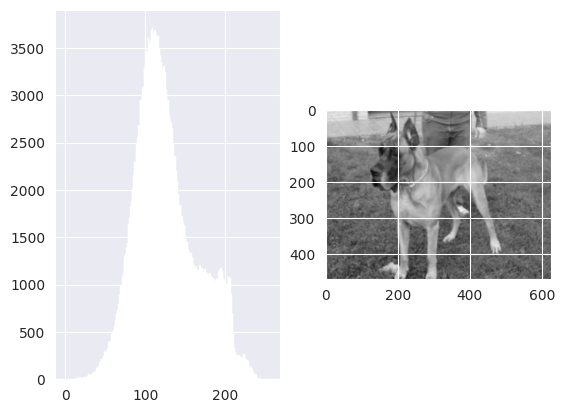

In [52]:
picture_plot(255
             )

In [53]:
## What are the dog image sizes.
## They are all varying sizes, for some images there are more than one dog
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImages(list_of_files, col=10, wSize=5, hSize=5, mypath='.'):
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = 10
    if (number_of_files % col != 0):
        row += 1
    for i in range(row+10):
        a=fig.add_subplot(row, col, i + 1)
        image = imread(list_of_files[i])
        imshow(image)
        axis('off')

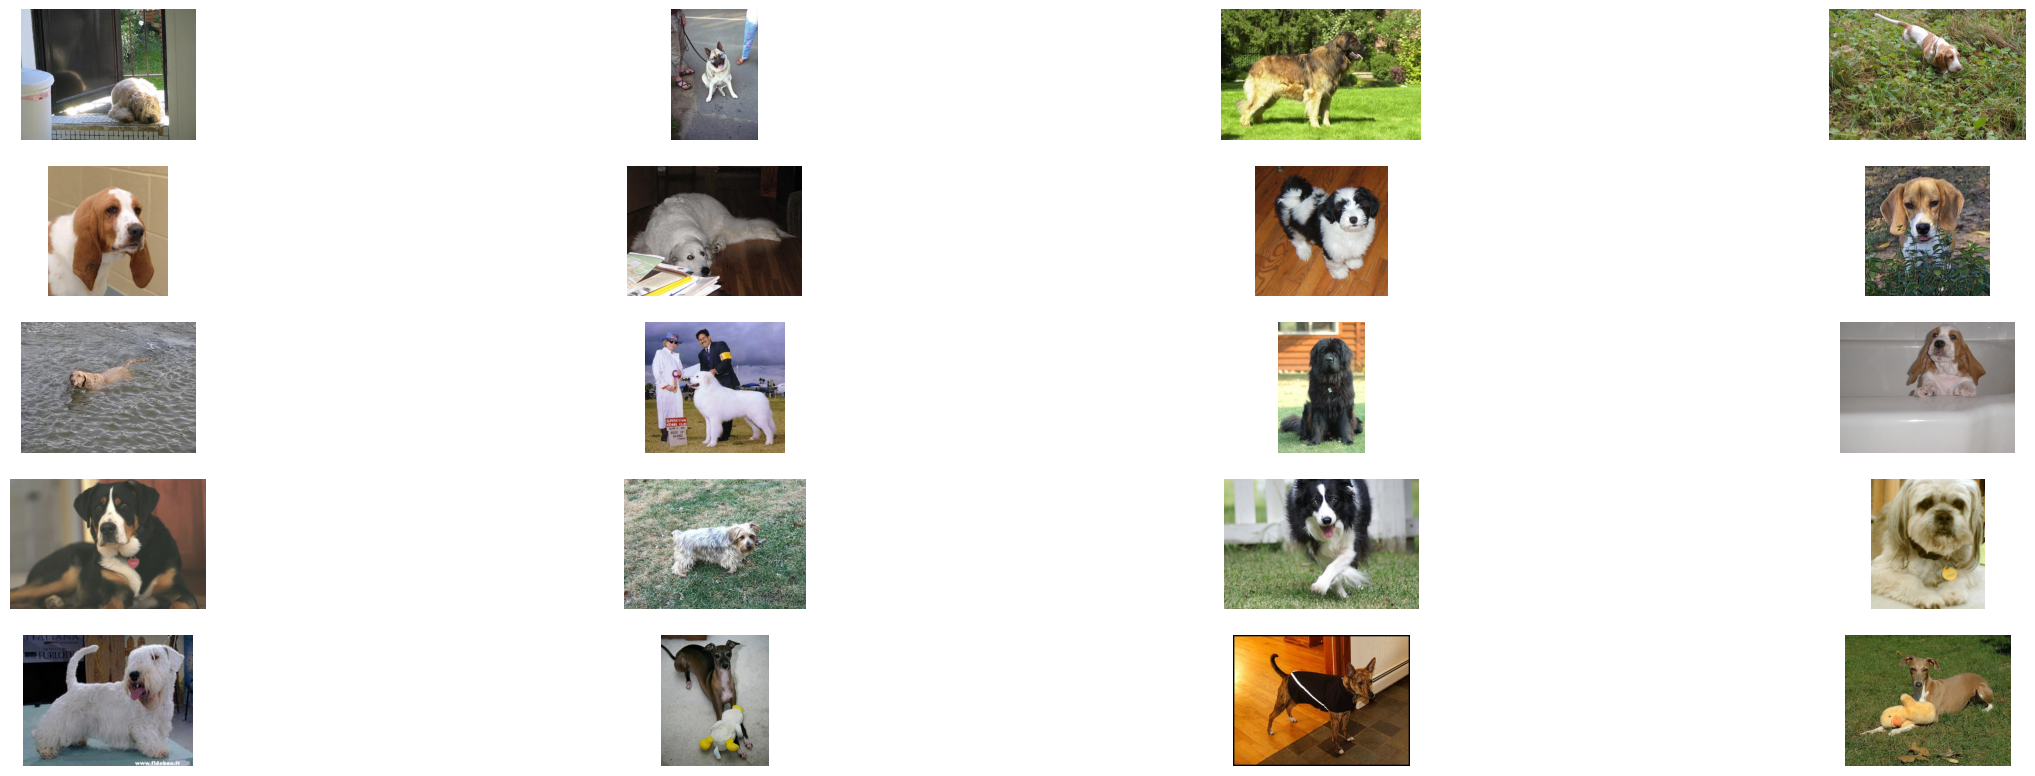

In [56]:
showImages(train_files, wSize=30, hSize=20, col=4)

In [57]:
# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("../dataset/Images/*/"))]

In [58]:
## this function plot the breeds distribution
def plot_breed(df):
    labels = []
    for i in range(df.shape[0]):
        labels.append(dog_names[np.argmax(df[i])])

    df_labels = pd.DataFrame(np.array(labels), columns=["breed"]).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(10,30))
    df_labels['breed'].value_counts().plot(ax=ax, kind='barh').invert_yaxis()
    ax.set_title('Distribution of Dog breeds')

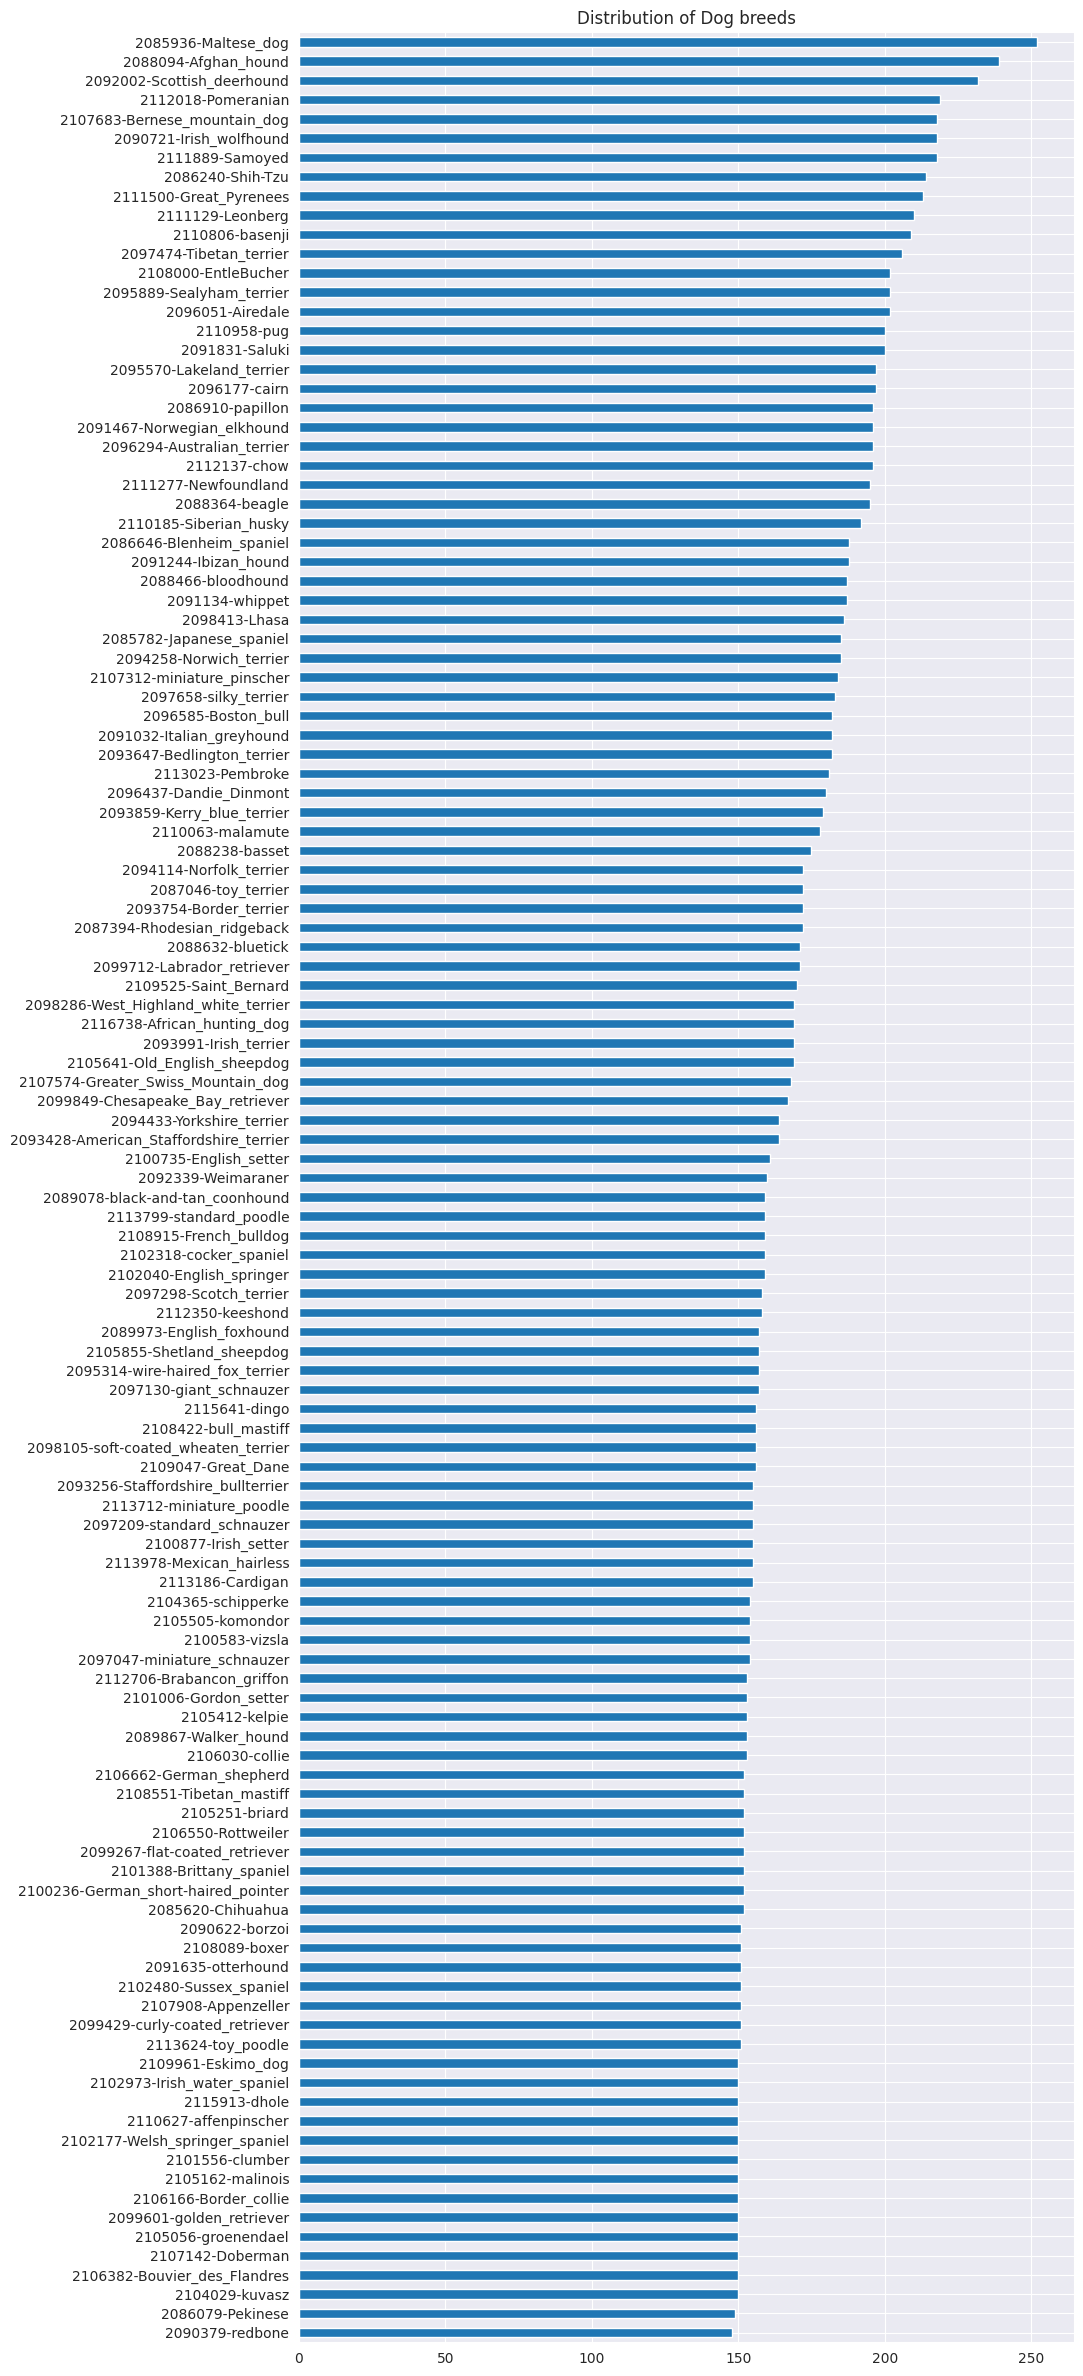

In [59]:
## breed distribution in test data
plot_breed(train_targets)

In [60]:
def display_img(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    return imgplot

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#### this function returns the shape of image, image itself and the  intensity distribution of an image
def img_hist(df_image, label):
    img = cv2.imread(df_image)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])

    print(dog_names[np.argmax(label)])
    print(img.shape)
    plt.show()
    #plt.imshow(img)
    display_img(df_image)

2088238-basset
(332, 500, 3)


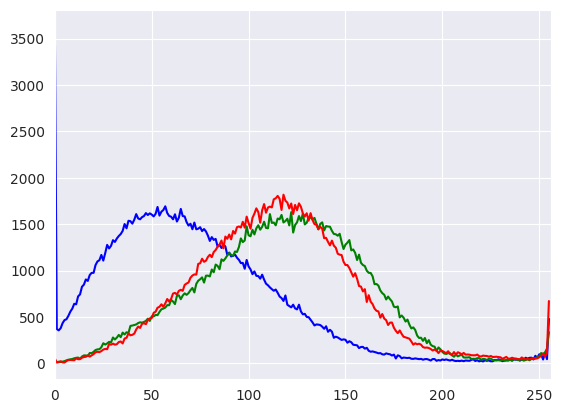

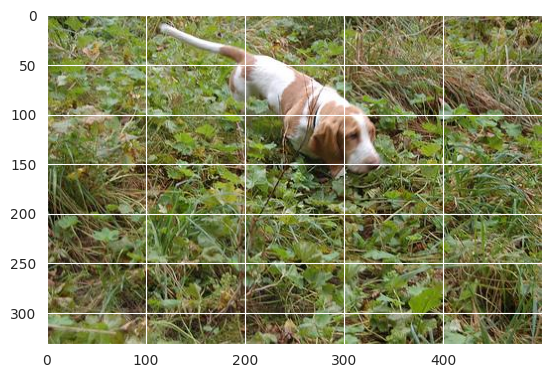

In [62]:
## here I checked the image sizes, and the  intensity distribution of images from the same breed
## and the result shows images have different resolution, zoom and lightening conditins even for the same breed
## it makes this task even more challenging
img_hist(train_files[3], train_targets[3])

2089867-Walker_hound
(329, 302, 3)


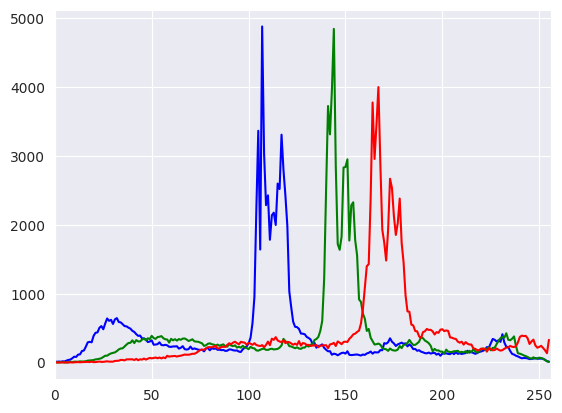

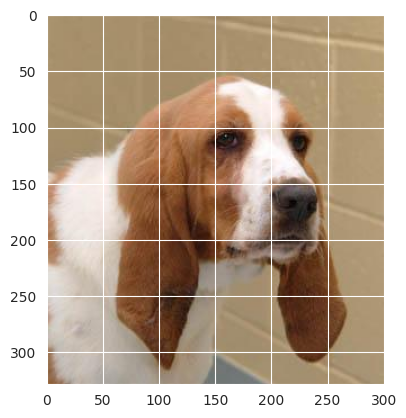

In [63]:
img_hist(train_files[4],train_targets[4])

2093647-Bedlington_terrier
(375, 500, 3)


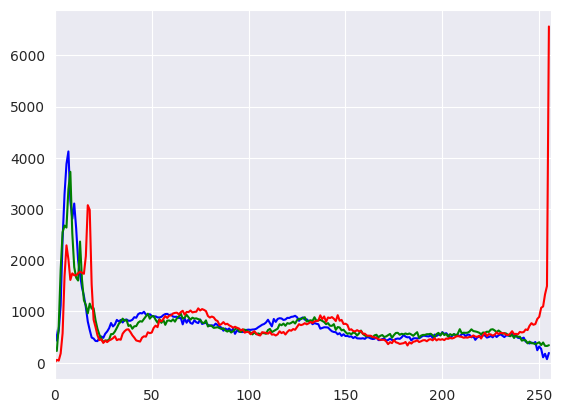

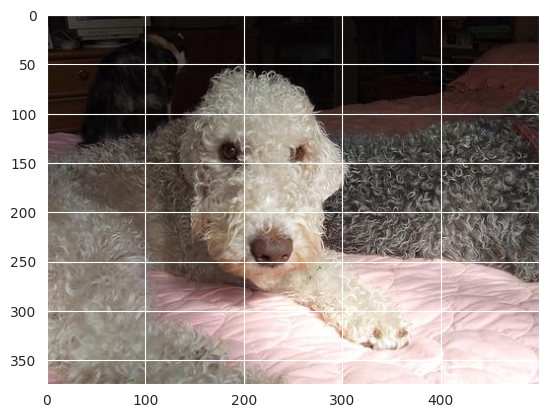

In [64]:
img_hist(train_files[57], train_targets[57])

In [65]:

## find the list of labels and save them as a pandas data
labels_train = []
labels_test = []

for i in range(train_files.shape[0]):
    labels_train.append(dog_names[np.argmax(train_targets[i])])

In [66]:
from sklearn.preprocessing import LabelEncoder

## this function plot the breeds distribution in train data
def dist_breed(labels):
    encoder = LabelEncoder()
    breeds_encoded = encoder.fit_transform(labels)
    n_classes = len(encoder.classes_)

    breeds = pd.DataFrame(np.array(breeds_encoded), columns=["breed"]).reset_index(drop=True)
    breeds['freq'] = breeds.groupby('breed')['breed'].transform('count')
    avg = breeds.freq.mean()

    title = 'Distribution of Dog Breeds in training Dataset\n (%3.0f samples per class on average)' % avg
    f, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.set_xticks([])

    ax.hlines(avg, 0, n_classes - 1, color='white')
    ax.set_title(title, fontsize=18)
    _ = ax.hist(breeds_encoded, bins=n_classes)

    return(breeds["freq"].describe())

count    20580.000000
mean       174.617881
std         24.602148
min        148.000000
25%        153.000000
50%        169.000000
75%        195.000000
max        252.000000
Name: freq, dtype: float64

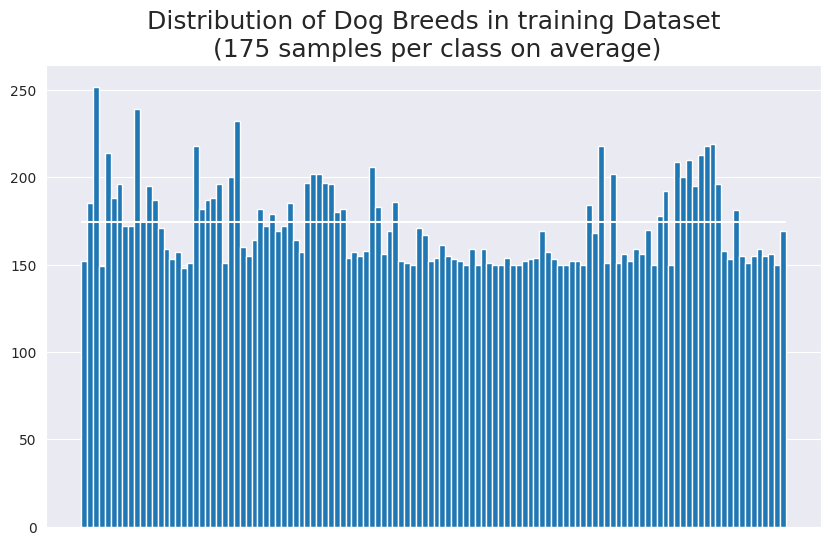

In [67]:
dist_breed(labels_train)

In [69]:
from tensorflow.keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

2023-04-07 11:18:06.342873: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-07 11:18:06.446198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-07 11:18:06.446357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

102967424/102967424 [==============================] - 7s 0us/step


In [73]:
# from keras.preprocessing import image
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [74]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [75]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [76]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
count_human = 0
count_dog = 0

# for i in human_files_short:
#     if dog_detector(i) == True:
#         count_human += 1

for i in train_files[:100]:
    if dog_detector(i) == True:
        count_dog += 1

print('%.f%% of the images in human_files_short have detected dog' %count_human)
print('%.f%% of the images in dog_files_short have detected dog' %count_dog)

2023-04-07 11:20:40.645922: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:417] Loaded runtime CuDNN library: 8.5.0 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2023-04-07 11:20:40.646684: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops.cc:1068 : UNIMPLEMENTED: DNN library is not found.
2023-04-07 11:20:40.646708: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): UNIMPLEMENTED: DNN library is not found.
	 [[{{node resnet50/conv1_conv/Conv2D}}]]


UnimplementedError: Graph execution error:

Detected at node 'resnet50/conv1_conv/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_10061/1732170325.py", line 11, in <module>
      if dog_detector(i) == True:
    File "/tmp/ipykernel_10061/1667219971.py", line 3, in dog_detector
      prediction = ResNet50_predict_labels(img_path)
    File "/tmp/ipykernel_10061/3982820138.py", line 6, in ResNet50_predict_labels
      return np.argmax(ResNet50_model.predict(img))
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 290, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/alex/Bureau/OpenClassroom/projet_6/venv/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 262, in convolution_op
      return tf.nn.convolution(
Node: 'resnet50/conv1_conv/Conv2D'
DNN library is not found.
	 [[{{node resnet50/conv1_conv/Conv2D}}]] [Op:__inference_predict_function_5080]

In [87]:
plt.imsave('pic.jpg', img1)

In [85]:
df

img
0  [[[125, 222, 190], [129, 226, 194], [127, 225,...

In [117]:

df = pd.DataFrame()
imgs = []
paths = []
breed  = []
# get heigth and width of the dog images
height, width = [], []
# for idx in range(len(train_files)):
#     img = cv2.imread(train_files[idx])
#     height.append(img.shape[0])
#     width.append(img.shape[1])
for folder in glob(f"../dataset/Images/*/*"):
    img = cv2.imread(folder)
    # img2 = cv2.imread('img2.png')
    imgs.append(img)
    paths.append(folder)
    height.append(img.shape[0])
    width.append(img.shape[1])
    breed.append(folder.split("/")[3].split("-")[1])

df['img'] = imgs
df["path"] = paths
df["breed"] = breed
df["height"] = height
df["width"] = width


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     20580 non-null  object
 1   path    20580 non-null  object
 2   breed   20580 non-null  object
 3   height  20580 non-null  int64 
 4   width   20580 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 804.0+ KB


In [120]:
df.head(2)

img  \
0  [[[252, 255, 251], [107, 111, 105], [88, 90, 8...   
1  [[[225, 138, 196], [225, 138, 196], [224, 137,...   

                                                path          breed  height  \
0  ../dataset/Images/n02109525-Saint_Bernard/n021...  Saint_Bernard     480   
1  ../dataset/Images/n02109525-Saint_Bernard/n021...  Saint_Bernard     333   

   width  
0    393  
1    500

In [116]:
df.breed.value_counts()

Maltese_dog               252
Afghan_hound              239
Scottish_deerhound        232
Pomeranian                219
Irish_wolfhound           218
                         ... 
kuvasz                    150
Eskimo_dog                150
Welsh_springer_spaniel    150
Pekinese                  149
redbone                   148
Name: breed, Length: 120, dtype: int64

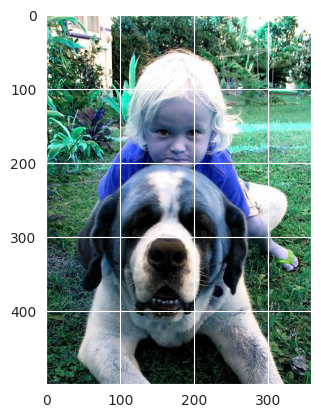

In [125]:
plt.imshow(df["img"][155])
plt.show()

In [88]:
# define function to load train, test, and validation datasets
def load_dataset_to_df(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 120)
    print(dog_targets)
    return dog_files, dog_targets

In [ ]:
def dog_class_graph(loc):
    list_names = []
    num_files = []
    dog_db = pd.DataFrame()

    for folder in sorted(glob(f"{loc}/*/")):
        list_names.append(folder.split("-")[1])
        print(len(folder))
        num_files.append(len(folder))
    dog_db['breed_name'] = list_names
    dog_db['num_images'] = num_files
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90)
    plt.bar(list_names, num_files)
    plt.show()
    return dog_db


dog_class_graph("../dataset/Images/")

In [89]:
load_dataset_to_df

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(array(['../dataset/Images/n02098105-soft-coated_wheaten_terrier/n02098105_2842.jpg',
        '../dataset/Images/n02091467-Norwegian_elkhound/n02091467_4110.jpg',
        '../dataset/Images/n02111129-Leonberg/n02111129_2617.jpg', ...,
        '../dataset/Images/n02099267-flat-coated_retriever/n02099267_720.jpg',
        '../dataset/Images/n02100583-vizsla/n02100583_9902.jpg',
        '../dataset/Images/n02089078-black-and-tan_coonhound/n02089078_314.jpg'],
       dtype='<U78'),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))